<a href="https://colab.research.google.com/github/Vensery/data-campaign-2122/blob/main/Mnist_Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_training, y_training),(X_test, y_test) = mnist.load_data()
print("X_training's shape:", X_training.shape)
print("y_training's shape:", y_training.shape)
print("X_test's shape:",X_test.shape)
print("y_test's shape:",y_test.shape)

X_training's shape: (60000, 28, 28)
y_training's shape: (60000,)
X_test's shape: (10000, 28, 28)
y_test's shape: (10000,)


In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_fit = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2974 - accuracy: 0.9135 - val_loss: 0.1428 - val_accuracy: 0.9571
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1435 - accuracy: 0.9571 - val_loss: 0.0986 - val_accuracy: 0.9709
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1078 - accuracy: 0.9679 - val_loss: 0.0845 - val_accuracy: 0.9735
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.9733 - val_loss: 0.0761 - val_accuracy: 0.9780
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0743 - accuracy: 0.9766 - val_loss: 0.0739 - val_accuracy: 0.9775
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0738 - val_accuracy: 0.9775
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0588 - accuracy: 0.9811 - val_loss: 0.0711 - val_accuracy:

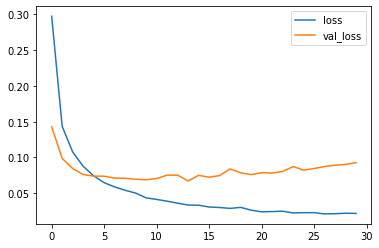

In [24]:
plt.plot(model_fit.history['loss'], label= 'loss')
plt.plot(model_fit.history['val_loss'], label= 'val_loss')
plt.legend()

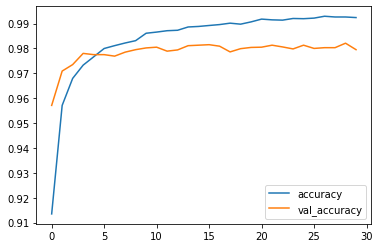

In [25]:
plt.plot(model_fit.history['accuracy'], label= 'accuracy')
plt.plot(model_fit.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [27]:
print("Start evaluating the model: ")
loss, categorical_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss of the trained model:', loss)
print('Test accuracy of the trained model:', categorical_accuracy)

Start evaluating the model: 
313/313 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9795

Test loss of the trained model: 0.09277158975601196
Test accuracy of the trained model: 0.9794999957084656


In [ ]:
from sklearn.model_selection import KFold
n_split=10
# number of divisions
result_accur=[];
kfold = KFold(n_splits=n_split, shuffle=True)
for train, test in kfold.split(x_train, y_train):
   
    model_fit = model.fit(x_train[train], y_train[train], validation_data=(x_train[test], y_train[test]), epochs=30)
    scores = model.evaluate(x_train[test], y_train[test], verbose=0)
    print(scores)
    # Increase fold number
    result_accur.append(scores);

Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0200 - accuracy: 0.9926 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.0065 - val_accuracy: 0.9977
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.0057 - val_accuracy: 0.9985
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0183 - accuracy: 0.9934 - val_loss: 0.0062 - val_accuracy: 0.9983
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0171 - accuracy: 0.9941 - val_loss: 0.0079 - val_accuracy: 0.9983
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0171 - accuracy: 0.9941 - val_loss: 0.0077 - val_accuracy: 0.9972
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0159 - accuracy: 0.9943 - val_loss: 0.0135 - val_accuracy:

In [110]:
accur=[x[1] for x in result_accur]
print(accur)
print(f"average accuracy：{np.mean(accur)}")

[0.9936666488647461, 0.9956666827201843, 0.996833324432373, 0.996666669845581, 0.9978333115577698, 0.9976666569709778, 0.9993333220481873, 0.9994999766349792, 0.999833345413208, 0.9993333220481873]
average accuracy：0.9976333260536194


In [111]:
from sklearn.metrics import matthews_corrcoef
Matthews_Correlation_Coefficient = matthews_corrcoef(y_test, p_test)
print('Matthews Correlation Coefficient:', Matthews_Correlation_Coefficient)

Matthews Correlation Coefficient: 0.9772182914276341


In [91]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [102]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
title="Confusion Matrix",
cmap = plt.cm.pink_r):
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    fmt = '.2f'
  else:
    fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix without normalization
[[ 970    1    1    0    0    0    3    1    3    1]
 [   0 1124    4    0    0    0    1    1    5    0]
 [   1    1 1014    3    3    0    2    5    3    0]
 [   1    0    5  990    0    4    0    7    2    1]
 [   0    0    2    0  967    0    4    1    0    8]
 [   1    0    0   11    1  865    4    2    6    2]
 [   4    3    1    1    4    7  935    0    3    0]
 [   3    3   10    2    1    0    0 1003    3    3]
 [   4    0    2    5    3    1    0    6  953    0]
 [   0    4    0    7    9    2    0    5    8  974]]


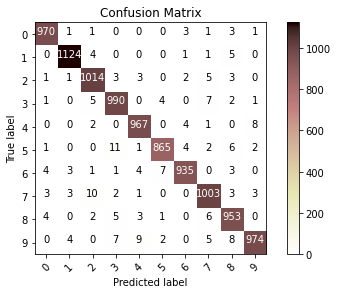

In [103]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [104]:
from sklearn.metrics import confusion_matrix
import itertools

In [106]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
title="Confusion Matrix",
cmap = plt.cm.pink_r):
  
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
     print("Confusion matrix without normalization")
  
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix without normalization
[[5920    0    1    0    0    0    0    0    2    0]
 [   0 6738    0    0    1    0    0    2    1    0]
 [   1    0 5956    0    0    0    0    0    0    1]
 [   0    0    1 6120    0    1    1    0    6    2]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   1    0    0    0    0 5404    9    0    7    0]
 [   2    0    0    0    4    1 5910    0    1    0]
 [   0    1    0    0    0    0    0 6263    0    1]
 [   0    0    1    0    0    2    0    0 5848    0]
 [   0    0    0    3    2    0    0    9    7 5928]]


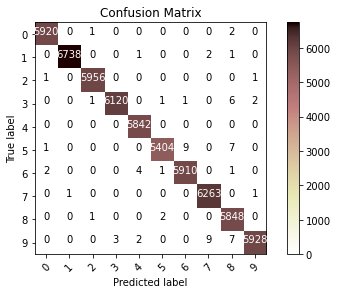

In [107]:
p_train = model.predict(x_train).argmax(axis=1)
cm = confusion_matrix(y_train, p_train)
plot_confusion_matrix(cm, list(range(10)))